<a href="https://colab.research.google.com/github/swamyappu/Assignment-8/blob/main/Lenet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import RMSprop, Adam, Adamax
from tensorflow.keras.callbacks import LearningRateScheduler
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Define the list of class names
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

# Preprocess the data
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)
x_train = x_train / 255.0
x_test = x_test / 255.0

# Define the model architecture
lenet = keras.models.Sequential([
    keras.layers.Conv2D(32, kernel_size=3, strides=1, activation='relu', input_shape=(32,32,3), padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(32, kernel_size=3, strides=1, activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(64, kernel_size=3, strides=1, activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(64, kernel_size=3, strides=1, activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

# Print the model summary
lenet.summary()

# Define the optimizer and compile the model
optimizer = Adamax(learning_rate=0.001)
lenet.compile(optimizer=optimizer, loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

# Define the learning rate scheduler
def lr_scheduler(epoch):
    if epoch < 50:
        return 0.001
    elif epoch < 80:
        return 0.0005
    else:
        return 0.0001

# Train the model
hist = lenet.fit(x_train, y_train, epochs=8, validation_data=(x_test, y_test), verbose=1, 
                 callbacks=[LearningRateScheduler(lr_scheduler)])


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_8 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_9 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                      

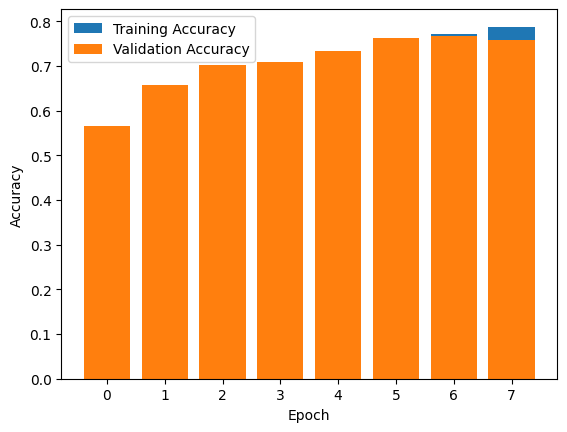

In [7]:
plt.bar(hist.epoch, hist.history['accuracy'], label='Training Accuracy')
plt.bar(hist.epoch, hist.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

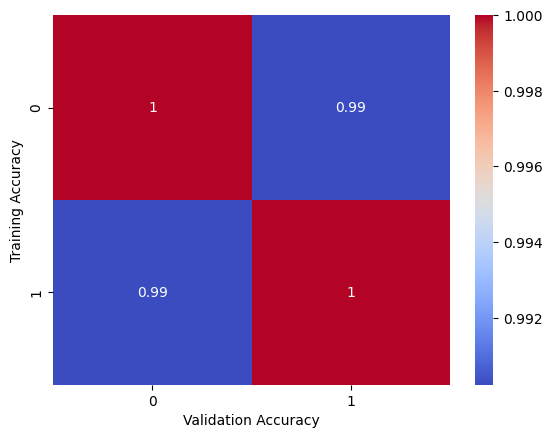

In [8]:
import seaborn as sns

corr = np.corrcoef(hist.history['accuracy'], hist.history['val_accuracy'])
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.xlabel('Validation Accuracy')
plt.ylabel('Training Accuracy')
plt.show()


In [ ]:
import plotly.graph_objs as go
import plotly.express as px

# Create a Plotly figure for accuracy curves
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(1, len(hist.history['accuracy'])+1),
                         y=hist.history['accuracy'],
                         mode='lines',
                         name='Training Accuracy'))
fig.add_trace(go.Scatter(x=np.arange(1, len(hist.history['val_accuracy'])+1),
                         y=hist.history['val_accuracy'],
                         mode='lines',
                         name='Validation Accuracy'))
fig.update_layout(title='Accuracy Curves',
                  xaxis_title='Epoch',
                  yaxis_title='Accuracy')

# Create a Plotly figure for loss curves
fig2 = go.Figure()
fig2.add_trace(go.Scatter(x=np.arange(1, len(hist.history['loss'])+1),
                         y=hist.history['loss'],
                         mode='lines',
                         name='Training Loss'))
fig2.add_trace(go.Scatter(x=np.arange(1, len(hist.history['val_loss'])+1),
                         y=hist.history['val_loss'],
                         mode='lines',
                         name='Validation Loss'))
fig2.update_layout(title='Loss Curves',
                  xaxis_title='Epoch',
                  yaxis_title='Loss')

# Display the Plotly figures
fig.show()
fig2.show()


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
y_predictions= lenet.predict(x_test)
y_predictions.reshape(-1,)
y_predictions= np.argmax(y_predictions, axis=1)

confusion_matrix(y_test, y_predictions)

313/313 [==============================] - 3s 8ms/step


array([[864,   9,  20,  16,   8,   1,   3,   7,  48,  24],
       [  9, 917,   2,   5,   0,   1,   3,   0,  17,  46],
       [ 48,   1, 750,  37,  55,  35,  49,  10,  12,   3],
       [ 14,   4,  50, 669,  53, 110,  52,  21,  15,  12],
       [ 13,   2,  44,  25, 828,  16,  34,  25,  12,   1],
       [ 16,   1,  34, 139,  35, 726,  15,  23,   6,   5],
       [  6,   2,  27,  30,  24,   9, 896,   0,   5,   1],
       [ 12,   1,  11,  34,  43,  37,   3, 851,   4,   4],
       [ 34,  14,   6,   4,   1,   0,   3,   2, 923,  13],
       [ 23,  40,   3,   9,   3,   1,   4,   6,  16, 895]])

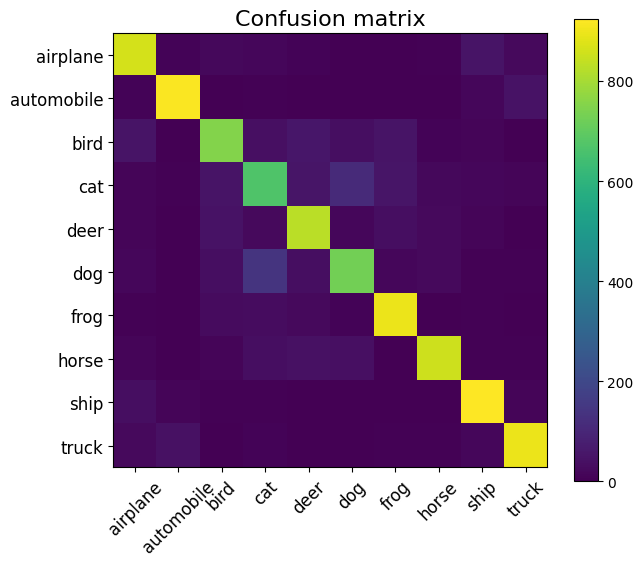

In [ ]:
# confusion matrix and accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
plt.figure(figsize=(7, 6))
plt.title('Confusion matrix', fontsize=16)
plt.imshow(confusion_matrix(y_test, y_predictions))
plt.xticks(np.arange(10), classes, rotation=45, fontsize=12)
plt.yticks(np.arange(10), classes, fontsize=12)
plt.colorbar()
plt.show()

In [ ]:
print("Test accuracy:", accuracy_score(y_test, y_predictions))

Test accuracy: 0.8319


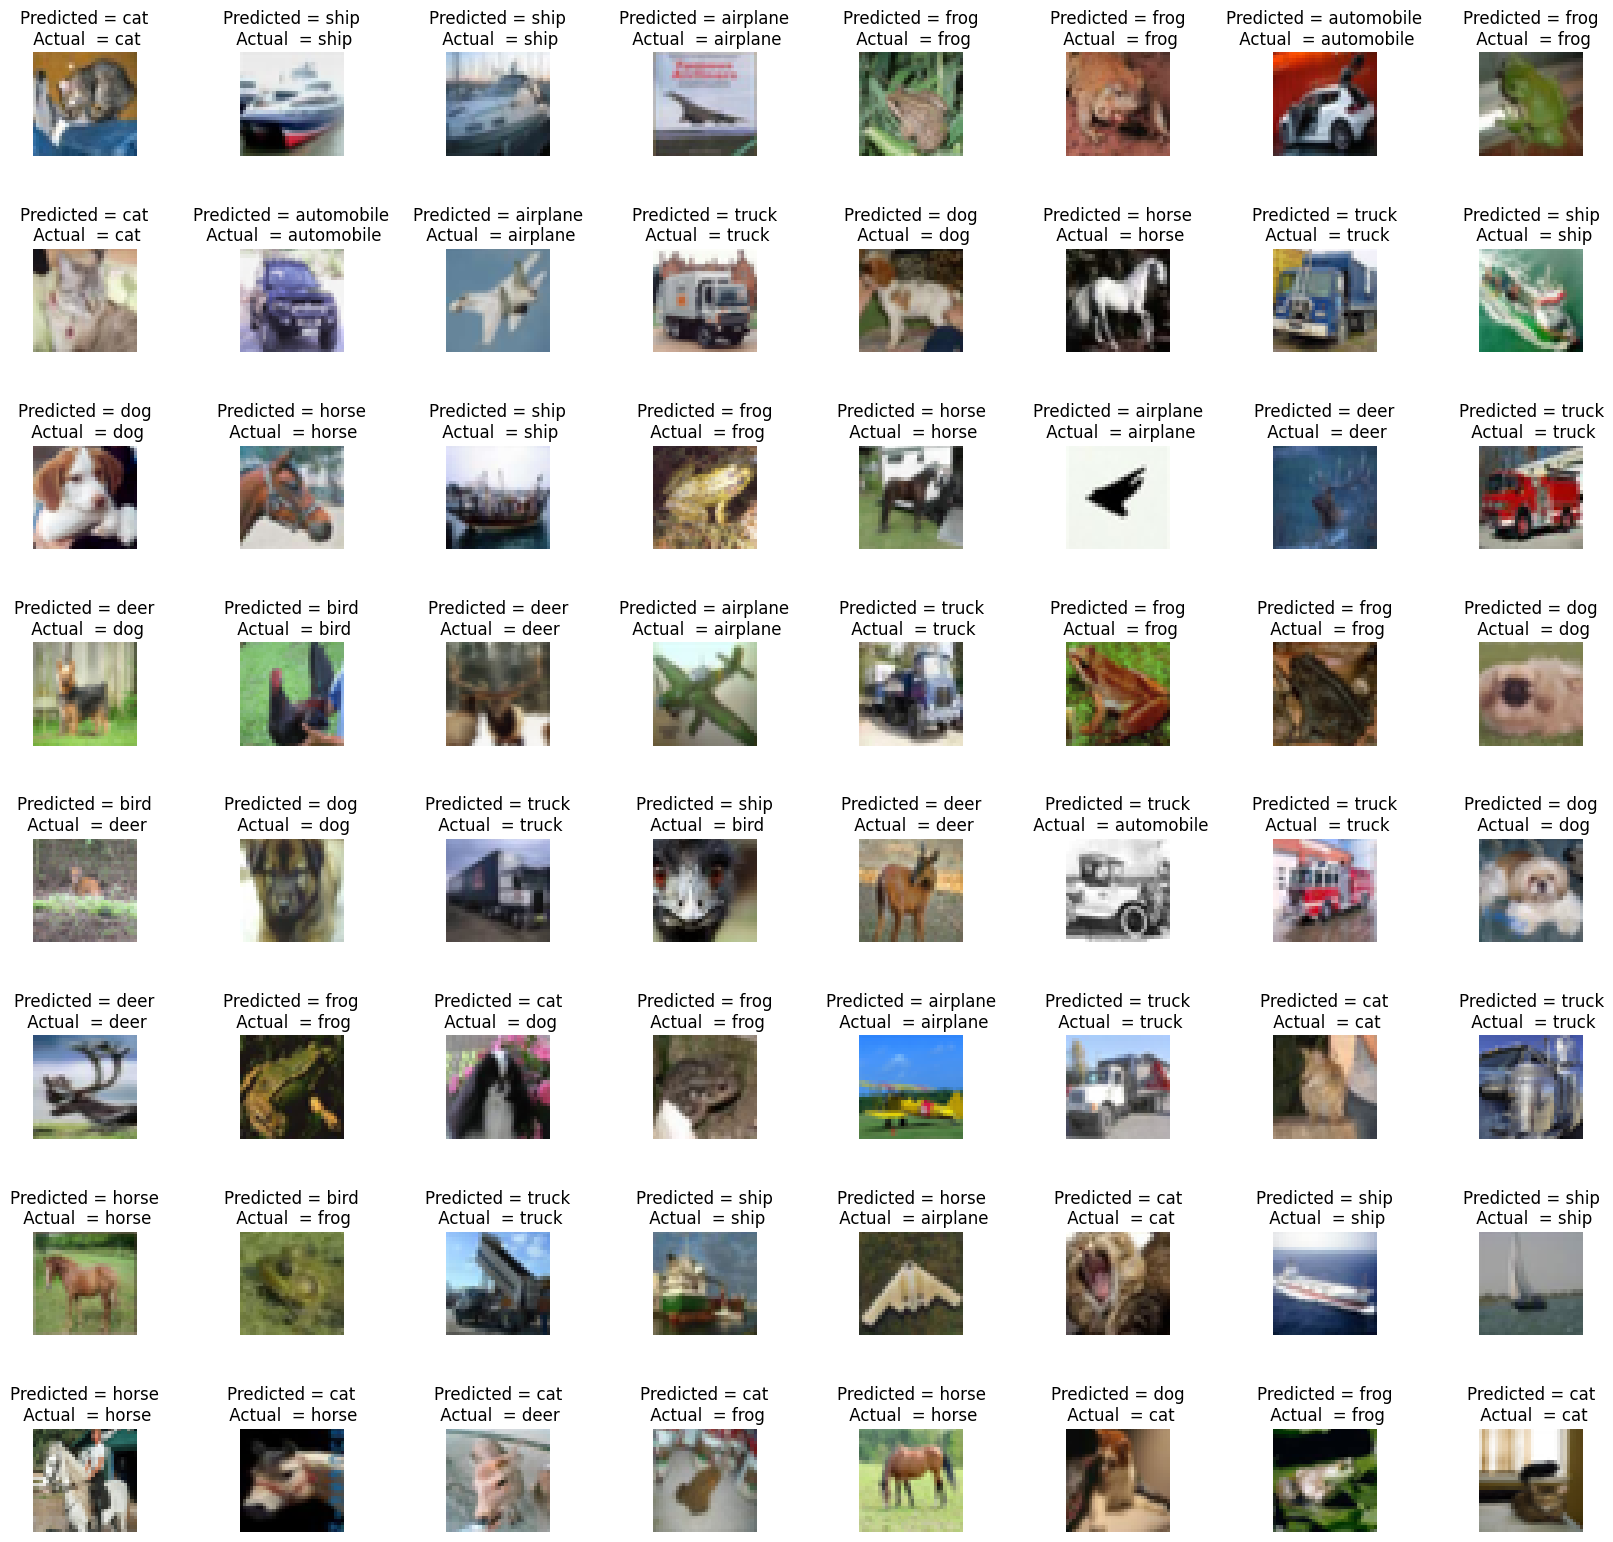

In [ ]:
L = 8
W = 8
fig, axes = plt.subplots(L, W, figsize = (20,20))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(x_test[i])
    axes[i].set_title("Predicted = {}\n Actual  = {}".format(classes[y_predictions[i]], classes[y_test[i]]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)